In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
import scipy
from datetime import datetime

In [2]:
bench_data = np.load('ct_train_1001_image.256256128.npy')
bench_data = np.expand_dims(bench_data, axis=(0))
print(bench_data.shape)

(1, 256, 256, 128)


## Benchmark Flip

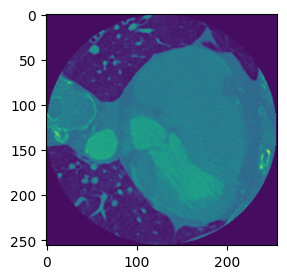

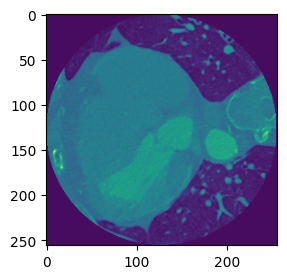

In [3]:
plt.imshow(bench_data[0][:,:,54])
plt.show()
bench_data = np.flip(bench_data, axis=2)
plt.imshow(bench_data[0][:,:,54])
plt.show()

In [4]:
r = 0

start_time = datetime.now()

for i in range(1000000):
    x = np.flip(bench_data, axis=2)
    r = x[0,0,0,0]
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 1000000)
print((float(time/1000000) / 1000000), 'millisec')

1998 nanoseconds
0.001998 millisec


## Benchmark Crop

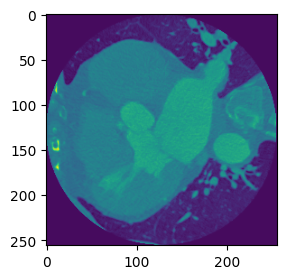

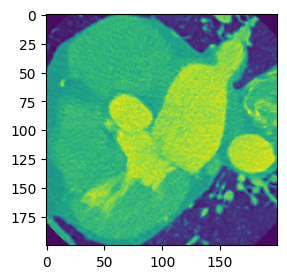

In [5]:
plt.imshow(bench_data[0][:,:,64])
plt.show()
bench_data = bench_data[:,28:228,28:228,14:114]
plt.imshow(bench_data[0][:,:,50])
plt.show()

In [6]:
r = 0

start_time = datetime.now()

for i in range(10000000):
    x = bench_data[:,28:228,28:228,14:114]
    r = x[0,0,0,0]
    
time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')

print(time / 10000000)
print((float(time/10000000) / 1000000), 'millisec')

380 nanoseconds
0.00038 millisec


## Benchmark Resize

(1, 200, 200, 100)


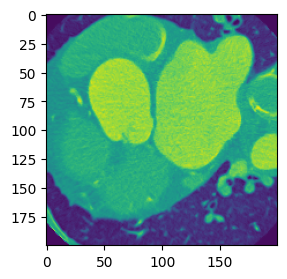

(200, 200, 100)


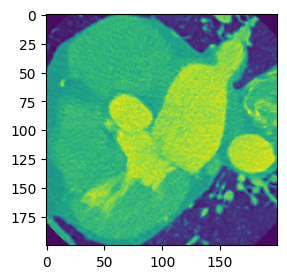

In [7]:
scales = [200.0/bench_data.shape[-3],200.0/bench_data.shape[-2],100.0/bench_data.shape[-1]]

print(bench_data.shape)
plt.imshow(bench_data[0][:,:,64])
plt.show()
scaled_data = scipy.ndimage.zoom(bench_data[0], scales, mode='reflect')
print(scaled_data.shape)
plt.imshow(scaled_data[:,:,50])
plt.show()

In [8]:
start_time = datetime.now()

for i in range(10):
    scaled_data = scipy.ndimage.zoom(bench_data[0], scales, mode='reflect')

time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')    
    
print(time / 10)
print((float(time/10) / 1000000), 'millisec')

865215400 nanoseconds
865.2154 millisec


## Add noise

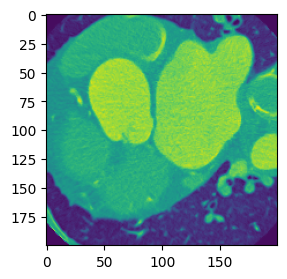

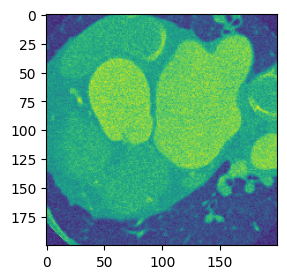

In [9]:
plt.imshow(bench_data[0][:,:,64])
plt.show()
noise = np.random.normal(0.0, 100, size = bench_data.shape)
res = bench_data + noise
plt.imshow(res[0][:,:,64])
plt.show()

In [10]:
start_time = datetime.now()

for i in range(100):
    noise = np.random.normal(0.0, 100, size = bench_data.shape)
    res = bench_data + noise

time = datetime.now() - start_time
time = np.timedelta64(time, 'ns') 

print(time / 100)
print((float(time/100) / 1000000), 'millisec')   

82525570 nanoseconds
82.52557 millisec


## Add blur

In [11]:
from scipy.ndimage import gaussian_filter

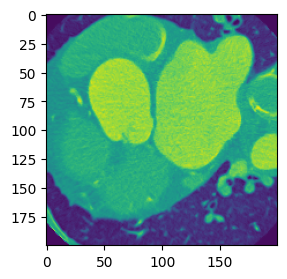

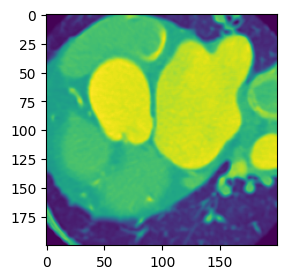

In [12]:
plt.imshow(bench_data[0][:,:,64])
plt.show()
res = gaussian_filter(bench_data[0], sigma=10, radius = 1)
plt.imshow(res[:,:,64])
plt.show()

In [13]:
start_time = datetime.now()

for i in range(100):
    res = gaussian_filter(bench_data[0], sigma=10, radius = 1)

time = datetime.now() - start_time
time = np.timedelta64(time, 'ns')     
    
print(time / 100)
print((float(time/100) / 1000000), 'millisec')    

41159970 nanoseconds
41.15997 millisec
